# Perceptron Algorithm

Desenvolvida por Rosenblatt (1958). Essa rede utiliza o modelo de McCulloch-Pitts como neurônio e introduziu o processo de treinamento de RNAs. 
A rede **perceptron** é treinada por um algoritmo **supervisionado** de correção de erro e utiliza a função de ativação do tipo **limiar**.

Desvantagem: Capaz de classificar apenas objetos linearmente separáveis.

In [3]:
import numpy as np

In [4]:
class Perceptron(object):
    """Perceptron Classifier.
    
    Parameters
    ----------
    eta: float
        Learning rate(between 0.0 and 1.0).
    n_iter: int
        Passes over the training dataset.
    
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
        
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where 
            n_samples is the number of samples and 
            n_features is the number of features.
            
        y: array-like, shape = [n_samples]
            Target values.
        
        Returns
        -------
        self: object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi #update the delta wm com n(yi - outputi) * xi
                self.w_[0] += update # update the delta w0 com n(yi - outputi)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Explicando por parte. 

- método **predict**. 

Chama o método `net_input` e passa o array. Se o valor retornado é superior ou igual a 0.0 (o **limite** ou em inglês **threshold**) a classe é classificada como **1**, senão ela é classificada como **-1**.

Podendo ser escrito matemáticamente como:

$$   
\phi(z) =
    \begin{cases}
      +1&,  \text{se z >= 0.0} \\
     -1&, \text{caso contrário}
    \end{cases}
$$

- método **net_input**

Faz a multiplicação de matriz do vetor de treinamento **X** com os pesos estipulados. Como o vetor de treinamento não tem o equivalente à $ x_0 w_0 $ e considerando que $ x_0 = 1 $ então só é contado o peso $ w_0 $. 

- método **fit**

inicializa os pesos com zero (uma outra implementação adiciona números bem pequenos randômicos aos pesos).
itera pelo número de iterações definidas na chamada do método e para cada elemento na matriz calcula o peso a partir da diferença entre o que era para ser previsto com o que foi realmente previsto. Se teve algum erro ele é adicionado na lista de erros. 

## Carregando os dados

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Separando 100 rótulos que correspondem à 50 Iris-Setosa (-1) e 50 Iris-Versicolor (1). No exercício é separado apenas os atributos `tamanho da sépala`(sepal length) e `tamanho da pétala`(petal length). Criando assim uma matriz de 2x2.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

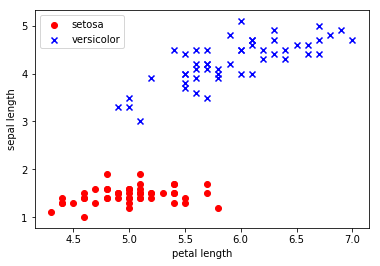

In [17]:
y = df.iloc[0:100, -1].values # pegando por inteiro (0 a 100) apenas a ultima coluna.
y = np.where(y == 'Iris-setosa', -1, 1) # se for Iris-Setosa recebe -1 senão recebe 1.
X = df.iloc[0:100, [0, 2]].values # pega de 0 a 100 também, as colunas 0 e 2 referentes aos atributos.

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

Ao observar os dois conjuntos de dados é possível perceber que eles estão linearmente separados.

## Treinamento

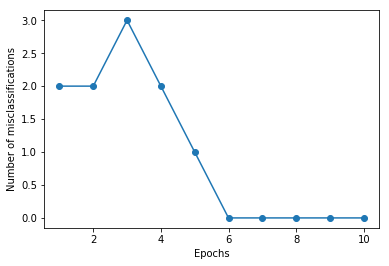

In [23]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() + 1
    
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    

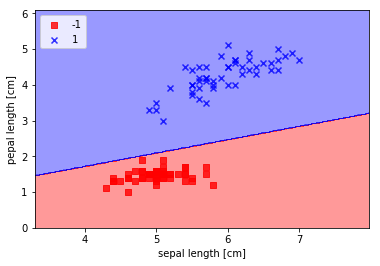

In [29]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('pepal length [cm]')
plt.legend(loc='upper left')
plt.show()

Obs.: Dúvidas sobre como escrever alguns desses códigos em latex segue uma referência que achei a melhor até agora http://meta.math.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference

Letras gregas 
http://web.ift.uib.no/Teori/KURS/WRK/TeX/sym1.html

Algumas fórmulas importantes.

net input: $ z = w_1  x_1 + ... + w_m  x_m $

que pode ser reescrita como $ z = w_0 x_0 + w_1 x_1 + ... + w_m x_m = w^T x $

activation function: $ \phi(z) $

## Referências

[1] [Python Machine Learning](https://github.com/rasbt/python-machine-learning-book) - contém o link para comprar o livro e o repositório oficial do autor.

[2] [Inteligência Artificial: Uma abordagem de Aprendizado de Máquina](https://www.amazon.com.br/dp/8521618808/ref=asc_df_85216188084808013?smid=A1ZZFT5FULY4LN&tag=goog0ef-20&linkCode=asn&creative=380341&creativeASIN=8521618808) 